<a href="https://colab.research.google.com/github/iamhero2709/Learning-Projects-Notebook/blob/main/tensorflow_withdl/DigitRecogn_tensorflow4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

DIGIT RECOGNISATION PROJECT WITH TENSOR FLOW
---
* DATATSET- MNSIT DATASET

In [80]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import Markdown, display


In [81]:
def printmd(string):
    display(Markdown('# <span style="color:red">'+string+'</span>'))

In [82]:
#importing the dataset MNIST using built in feature
mnist=tf.keras.datasets.mnist # loading dataset
(x_train,y_train),(x_test,y_test)=mnist.load_data() # spliiting into train and test data

In [83]:
# the feature data are between 0 and 255 and we will normalize this to improve optmization performancxe


In [84]:
x_train, x_test = x_train / 255.0, x_test / 255.0

In [85]:
# lets look at first few lables
print(y_train[0:5])

[5 0 4 1 9]


In [86]:
print("categorical labels")
print(y_train[0:5])

# make labels one hot encoded
y_train = tf.one_hot(y_train, 10)
y_test = tf.one_hot(y_test, 10)

print("one hot encoded labels")
print(y_train[0:5])

categorical labels
[5 0 4 1 9]
one hot encoded labels
tf.Tensor(
[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]], shape=(5, 10), dtype=float32)


In [87]:
print("no of training examples :", x_train.shape[0])
print("no of test examples :", x_test.shape[0])


no of training examples : 60000
no of test examples : 10000


creating new datsaset

In [88]:
train_ds = tf.data.Dataset.from_tensor_slices((x_train, y_train)).batch(50)
test_ds = tf.data.Dataset.from_tensor_slices((x_test, y_test)).batch(50)

In [89]:
# converting 2d image into 1d vectr

In [90]:
from tensorflow.keras.layers import Flatten
flatten=Flatten(dtype='float32')
"original data shape"
print(x_train.shape)
#flattended shape
print(flatten(x_train).shape)

(60000, 28, 28)
(60000, 784)


tf.Variable creates adjustable variables that are in the global namespace, so any function that references these variables need not pass the varibles. But they are globals, so exercise caution when naming!

In [91]:
# weight tensors
W=tf.Variable(tf.zeros([784,10],tf.float32))
# Bias tensor
b = tf.Variable(tf.zeros([10], tf.float32))


<img src="https://ibm.box.com/shared/static/88ksiymk1xkb10rgk0jwr3jw814jbfxo.png" alt="HTML5 Icon" style="width:350px">
<div style="text-align:center">Illustration showing how weights and biases are added to neurons/nodes. </div>


forward propogation

In [92]:
def forward(x):
  return tf.matmul(x,W)+b

softmax regression -activation fuynction that is usaully for classification
* o-1 input

In [139]:
#asample softmax calculation on an input vector
vector=[10,0.2,8]
softmax=tf.nn.softmax(vector) #softmax
print("softmax calculation")
print(softmax.numpy())
print("verifying normalization")
print(tf.reduce_sum(softmax))
print("finding vector with largest value (label assignment)")
print("category", tf.argmax(softmax).numpy())

softmax calculation
[8.8075405e-01 4.8839214e-05 1.1919710e-01]
verifying normalization
tf.Tensor(1.0, shape=(), dtype=float32)
finding vector with largest value (label assignment)
category 0


In [94]:
#Now we can define our output layer
def activate(x):
  return tf.nn.softmax(forward(x))


In [140]:
#model function

In [95]:
def model(x):
  x=flatten(x)
  return activate(x)


cost fuinction- minimize the difrrence between predicted and actual answer

In [96]:
def cross_entropy(y_label, y_pred):
    return (-tf.reduce_sum(y_label * tf.math.log(y_pred + 1.e-10)))
# addition of 1e-10 to prevent errors in zero calculations

# current loss function for unoptimized model
cross_entropy(y_train, model(x_train)).numpy()

np.float32(138155.12)

In [97]:
optimizer = tf.keras.optimizers.SGD(learning_rate=0.25) # optimizer

In [141]:
# train using mini batch

In [98]:
def train_step(x, y ):
    with tf.GradientTape() as tape:
        #compute loss function
        current_loss = cross_entropy( y, model(x))
        # compute gradient of loss
        #(This is automatic! Even with specialized funcctions!)
        grads = tape.gradient( current_loss , [W,b] )
        # Apply SGD step to our Variables W and b
        optimizer.apply_gradients( zip( grads , [W,b] ) )
    return current_loss.numpy()

In [99]:
# zeroing out weights in case you want to run this cell multiple times
# Weight tensor
W = tf.Variable(tf.zeros([784, 10],tf.float32))
# Bias tensor
b = tf.Variable(tf.zeros([10],tf.float32))

loss_values=[]
accuracies = []
epochs = 10

for i in range(epochs):
    j=0
    # each batch has 50 examples
    for x_train_batch, y_train_batch in train_ds:
        j+=1
        current_loss = train_step(x_train_batch, y_train_batch)
        if j%500==0: #reporting intermittent batch statistics
            print("epoch ", str(i), "batch", str(j), "loss:", str(current_loss) )

    # collecting statistics at each epoch...loss function and accuracy
    #  loss function
    current_loss = cross_entropy( y_train, model( x_train )).numpy()
    loss_values.append(current_loss)
    correct_prediction = tf.equal(tf.argmax(model(x_train), axis=1),
                                  tf.argmax(y_train, axis=1))
    #  accuracy
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32)).numpy()
    accuracies.append(accuracy)
    print("end of epoch ", str(i), "loss", str(current_loss), "accuracy", str(accuracy) )


epoch  0 batch 500 loss: 308.78094
epoch  0 batch 1000 loss: 243.85347
end of epoch  0 loss 335063.8 accuracy 0.73728335
epoch  1 batch 500 loss: 270.43488
epoch  1 batch 1000 loss: 239.25098
end of epoch  1 loss 331978.1 accuracy 0.74156666
epoch  2 batch 500 loss: 290.95187
epoch  2 batch 1000 loss: 253.18973
end of epoch  2 loss 325348.25 accuracy 0.7507667
epoch  3 batch 500 loss: 292.71637
epoch  3 batch 1000 loss: 260.54138
end of epoch  3 loss 321318.7 accuracy 0.75453335
epoch  4 batch 500 loss: 289.2487
epoch  4 batch 1000 loss: 242.80728
end of epoch  4 loss 326882.06 accuracy 0.7500833
epoch  5 batch 500 loss: 280.16818
epoch  5 batch 1000 loss: 230.50214
end of epoch  5 loss 321615.75 accuracy 0.75516665
epoch  6 batch 500 loss: 277.45898
epoch  6 batch 1000 loss: 230.25873
end of epoch  6 loss 318383.2 accuracy 0.7596667
epoch  7 batch 500 loss: 296.34238
epoch  7 batch 1000 loss: 230.25853
end of epoch  7 loss 317834.22 accuracy 0.7604667
epoch  8 batch 500 loss: 294.9890

Text(0, 0.5, 'loss')

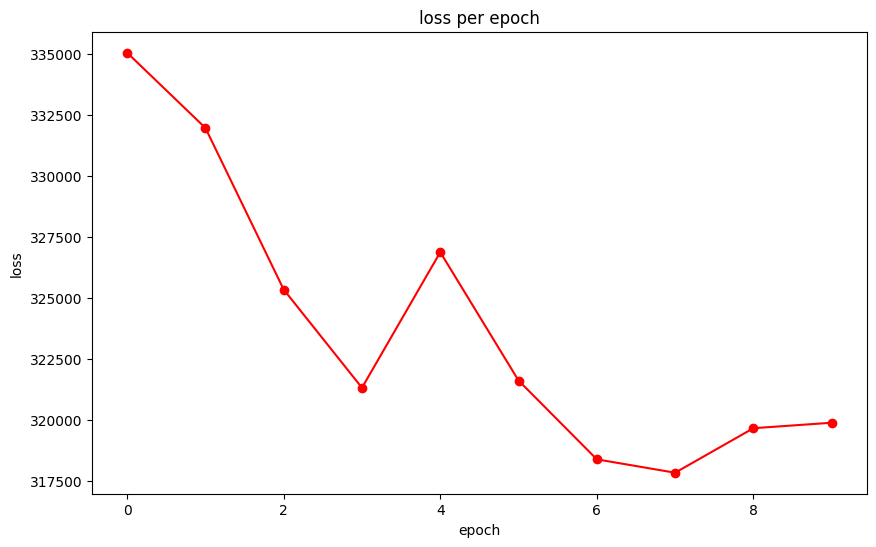

In [100]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 6)
#print(loss_values)
plt.plot(loss_values,'-ro')
plt.title("loss per epoch")
plt.xlabel("epoch")
plt.ylabel("loss")

Text(0, 0.5, 'accuracy')

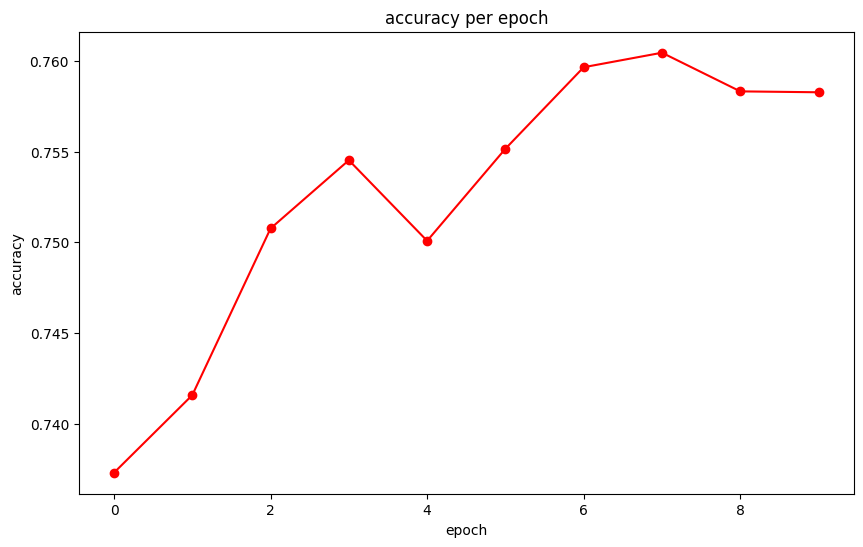

In [101]:
plt.plot(accuracies,'-ro')
plt.title("accuracy per epoch")
plt.xlabel("epoch")
plt.ylabel("accuracy")

PART 2 DEEP LEARNING APPLIED ON MNIST


In the first part, we learned how to use a simple ANN to classify MNIST. Now we are going to expand our knowledge using a Deep Neural Network.


Architecture of our network is:
    
- (Input) -> [batch_size, 28, 28, 1]  >> Apply 32 filter of [5x5]
- (Convolutional layer 1)  -> [batch_size, 28, 28, 32]
- (ReLU 1)  -> [?, 28, 28, 32]
- (Max pooling 1) -> [?, 14, 14, 32]
- (Convolutional layer 2)  -> [?, 14, 14, 64]
- (ReLU 2)  -> [?, 14, 14, 64]
- (Max pooling 2)  -> [?, 7, 7, 64]
- [fully connected layer 3] -> [1x1024]
- [ReLU 3]  -> [1x1024]
- [Drop out]  -> [1x1024]
- [fully connected layer 4] -> [1x10]


The next cells will explore this new architecture.


Intial parameters
---

In [102]:
# creaing genral paramters for the model


In [103]:
width=28 # width of the image in the pixels
height=28 # height of the image in pixels
flat=width*height # # no of pixels in one image
class_output=10 # no of possible classification for the problems

converting the image datset to tensors

In [104]:
x_image_train = tf.reshape(x_train, [-1,28,28,1])
x_image_train = tf.cast(x_image_train, 'float32')

x_image_test = tf.reshape(x_test, [-1,28,28,1])
x_image_test = tf.cast(x_image_test, 'float32')

#creating new dataset with reshaped inputs
train_ds2 = tf.data.Dataset.from_tensor_slices((x_image_train, y_train)).batch(50)
test_ds2 = tf.data.Dataset.from_tensor_slices((x_image_test, y_test)).batch(50)

In [105]:
x_image_train = tf.slice(x_image_train,[0,0,0,0],[10000, 28, 28, 1])
y_train = tf.slice(y_train,[0,0],[10000, 10])

In [142]:
# convulation layer 1
# defining kernel weight and bias
#kernel tensor of shape [filter_height, filter_width, in_channels, out_channels]

In [143]:
# to create convulation layter we use tf.nn.conv2d - it computes a 2-d convulation given 4-D input and filter tensors

In [106]:
W_conv1 = tf.Variable(tf.random.truncated_normal([5, 5, 1, 32], stddev=0.1, seed=0))
b_conv1 = tf.Variable(tf.constant(0.1, shape=[32])) # need 32 biases for 32 outputs

In [107]:
def convolve1(x):
    return(
        tf.nn.conv2d(x, W_conv1, strides=[1, 1, 1, 1], padding='SAME') + b_conv1)

In [144]:
# applying relu activation function f(x)=max(0,x)

In [108]:
def h_conv1(x): return(tf.nn.relu(convolve1(x)))

In [145]:
#Applyt the max pooling
# form of non linear down sampling it partions rthe inputs image into a set of reactangles and then
# find the maximum value for that region
# we use tf.nn.max_pool function to perform max pooling

In [146]:
# conculation layer 2

In [109]:
W_conv2 = tf.Variable(tf.random.truncated_normal([5, 5, 32, 64], stddev=0.1, seed=1))
b_conv2 = tf.Variable(tf.constant(0.1, shape=[64])) #need 64 biases for 64 outputs

In [110]:
def convolve2(x):
    return(
    tf.nn.conv2d(conv1(x), W_conv2, strides=[1, 1, 1, 1], padding='SAME') + b_conv2)

In [111]:
def h_conv2(x):  return tf.nn.relu(convolve2(x))

In [112]:
def conv2(x):
    return(
    tf.nn.max_pool(h_conv2(x), ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME'))

In [147]:
# flatteing second layer

In [148]:
def layer2_matrix(x): return tf.reshape(conv2(x), [-1, 7 * 7 * 64])

In [149]:
# weight and bisases between 2 and 3 layer

In [114]:
W_fc1 = tf.Variable(tf.random.truncated_normal([7 * 7 * 64, 1024], stddev=0.1, seed = 2))
b_fc1 = tf.Variable(tf.constant(0.1, shape=[1024])) # need 1024 biases for 1024 outputs

In [150]:
# matrix multiplication (applying weight and biases)

In [115]:
def fcl(x): return tf.matmul(layer2_matrix(x), W_fc1) + b_fc1

In [151]:
# appling the relu activation function

In [116]:
def h_fc1(x): return tf.nn.relu(fcl(x))

In [152]:
#dropout layer - optional pahse for reduce overfiiting # it is phase
# where the netweok forget some fearture

In [153]:
keep_prob=0.5
def layer_drop(x): return tf.nn.dropout(h_fc1(x), keep_prob)

In [154]:
# Readout layer(softmax layer)
# Type :softmax , fully connected layer
# in last layer cnn takes high level filtered images and translate them into votes uisng softmax }

In [118]:
W_fc2 = tf.Variable(tf.random.truncated_normal([1024, 10], stddev=0.1, seed = 2)) #1024 neurons
b_fc2 = tf.Variable(tf.constant(0.1, shape=[10])) # 10 possibilities for digits [0,1,2,3,4,5,6,7,8,9]

In [155]:
# matrix multiplication

In [119]:
def fc(x): return tf.matmul(layer_drop(x), W_fc2) + b_fc2

In [156]:
# appying the softmax activation function|

In [120]:
def y_CNN(x): return tf.nn.softmax(fc(x))

<a id="ref7"></a>
<h2>Summary of the Deep Convolutional Neural Network</h2>

#### 0) Input - MNIST dataset
#### 1) Convolutional and Max-Pooling
#### 2) Convolutional and Max-Pooling
#### 3) Fully Connected Layer
#### 4) Processing - Dropout
#### 5) Readout layer - Fully Connected
#### 6) Outputs - Classified digits


<a id="ref8"></a>
<h2>Define functions and train the model</h2>


In [157]:
# define loss function

In [121]:
import numpy as np
layer4_test =[[0.9, 0.1, 0.1],[0.9, 0.1, 0.1]]
y_test=[[1.0, 0.0, 0.0],[1.0, 0.0, 0.0]]
np.mean( -np.sum(y_test * np.log(layer4_test),1))

np.float64(0.10536051565782628)

In [122]:
def cross_entropy(y_label, y_pred):
    return (-tf.reduce_sum(y_label * tf.math.log(y_pred + 1.e-10)))

In [158]:
#define optimizer

In [123]:
optimizer = tf.keras.optimizers.Adam(1e-4)

In [159]:
# gradient tape to define model

In [124]:
variables = [W_conv1, b_conv1, W_conv2, b_conv2,
             W_fc1, b_fc1, W_fc2, b_fc2, ]

def train_step(x, y):
    with tf.GradientTape() as tape:
        current_loss = cross_entropy( y, y_CNN( x ))
        grads = tape.gradient( current_loss , variables )
        optimizer.apply_gradients( zip( grads , variables ) )
        return current_loss.numpy()


In [160]:
#define prediction

In [125]:
correct_prediction = tf.equal(tf.argmax(y_CNN(x_image_train), axis=1), tf.argmax(y_train, axis=1))

In [161]:
# define accuracy

In [126]:
accuracy = tf.reduce_mean(tf.cast(correct_prediction, 'float32'))

In [ ]:
# train the model

In [127]:
loss_values=[]
accuracies = []
epochs = 1

for i in range(epochs):
    j=0
    # each batch has 50 examples
    for x_train_batch, y_train_batch in train_ds2:
        j+=1
        current_loss = train_step(x_train_batch, y_train_batch)
        if j%50==0: #reporting intermittent batch statistics
            correct_prediction = tf.equal(tf.argmax(y_CNN(x_train_batch), axis=1),
                                  tf.argmax(y_train_batch, axis=1))
            #  accuracy
            accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32)).numpy()
            print("epoch ", str(i), "batch", str(j), "loss:", str(current_loss),
                     "accuracy", str(accuracy))

    current_loss = cross_entropy( y_train, y_CNN( x_image_train )).numpy()
    loss_values.append(current_loss)
    correct_prediction = tf.equal(tf.argmax(y_CNN(x_image_train), axis=1),
                                  tf.argmax(y_train, axis=1))
    #  accuracy
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32)).numpy()
    accuracies.append(accuracy)
    print("end of epoch ", str(i), "loss", str(current_loss), "accuracy", str(accuracy) )

epoch  0 batch 50 loss: 94.8143 accuracy 0.5
epoch  0 batch 100 loss: 48.98654 accuracy 0.72
epoch  0 batch 150 loss: 26.150263 accuracy 0.86
epoch  0 batch 200 loss: 11.523142 accuracy 0.86
epoch  0 batch 250 loss: 26.599339 accuracy 0.78
epoch  0 batch 300 loss: 16.153954 accuracy 0.82
epoch  0 batch 350 loss: 17.650232 accuracy 0.78
epoch  0 batch 400 loss: 13.876718 accuracy 0.9
epoch  0 batch 450 loss: 23.464823 accuracy 0.76
epoch  0 batch 500 loss: 12.374112 accuracy 0.86
epoch  0 batch 550 loss: 14.12169 accuracy 0.88
epoch  0 batch 600 loss: 21.551231 accuracy 0.88
epoch  0 batch 650 loss: 16.67681 accuracy 0.82
epoch  0 batch 700 loss: 6.874679 accuracy 0.92
epoch  0 batch 750 loss: 29.260061 accuracy 0.92
epoch  0 batch 800 loss: 12.793666 accuracy 0.92
epoch  0 batch 850 loss: 16.42563 accuracy 0.92
epoch  0 batch 900 loss: 10.743826 accuracy 0.96
epoch  0 batch 950 loss: 18.453773 accuracy 0.9
epoch  0 batch 1000 loss: 9.915934 accuracy 0.94
epoch  0 batch 1050 loss: 4.702

In [162]:
# evalute the model

In [128]:
j=0
acccuracies=[]
# evaluate accuracy by batch and average...reporting every 100th batch
for x_train_batch, y_train_batch in train_ds2:
        j+=1
        correct_prediction = tf.equal(tf.argmax(y_CNN(x_train_batch), axis=1),
                                  tf.argmax(y_train_batch, axis=1))
        accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32)).numpy()
        #accuracies.append(accuracy)
        if j%100==0:
            print("batch", str(j), "accuracy", str(accuracy) )
import numpy as np
print("accuracy of entire set", str(np.mean(accuracies)))

batch 100 accuracy 0.96
batch 200 accuracy 1.0
batch 300 accuracy 0.9
batch 400 accuracy 0.94
batch 500 accuracy 0.98
batch 600 accuracy 0.92
batch 700 accuracy 1.0
batch 800 accuracy 0.98
batch 900 accuracy 0.92
batch 1000 accuracy 0.92
batch 1100 accuracy 0.96
batch 1200 accuracy 0.98
accuracy of entire set 0.945


In [129]:
kernels = tf.reshape(tf.transpose(W_conv1, perm=[2, 3, 0,1]),[32, -1])

--2025-07-13 15:50:31--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DL0120EN-SkillsNetwork/labs/Week2/data/utils.py
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.45.118.108
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.45.118.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5097 (5.0K) [text/x-python]
Saving to: ‘utils1.py’

utils1.py           100%[===================>]   4.98K  --.-KB/s    in 0s      

2025-07-13 15:50:32 (840 MB/s) - ‘utils1.py’ saved [5097/5097]



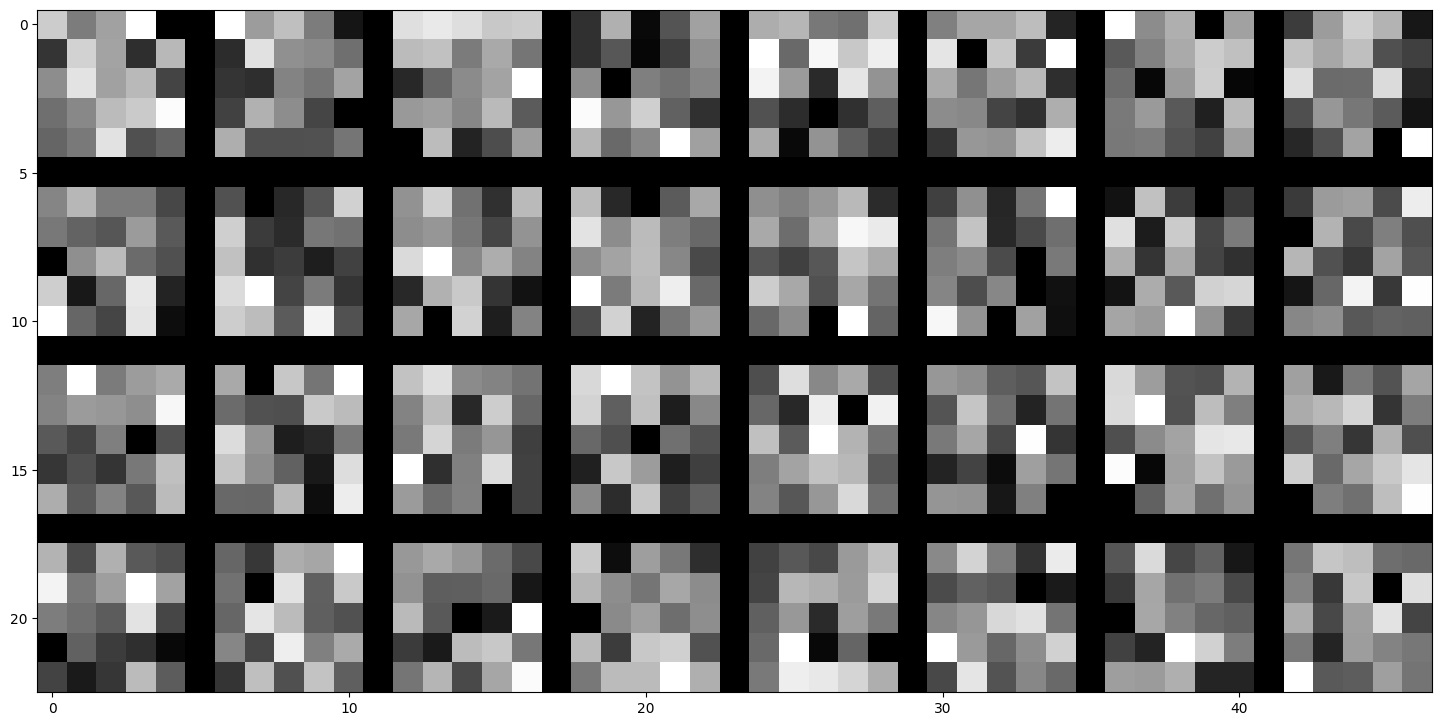

In [130]:
!wget --output-document utils1.py https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DL0120EN-SkillsNetwork/labs/Week2/data/utils.py
import utils1
import imp
imp.reload(utils1)
from utils1 import tile_raster_images
import matplotlib.pyplot as plt
from PIL import Image
%matplotlib inline
image = Image.fromarray(tile_raster_images(kernels.numpy(), img_shape=(5, 5) ,tile_shape=(4, 8), tile_spacing=(1, 1)))
### Plot image
plt.rcParams['figure.figsize'] = (18.0, 18.0)
imgplot = plt.imshow(image)
imgplot.set_cmap('gray')

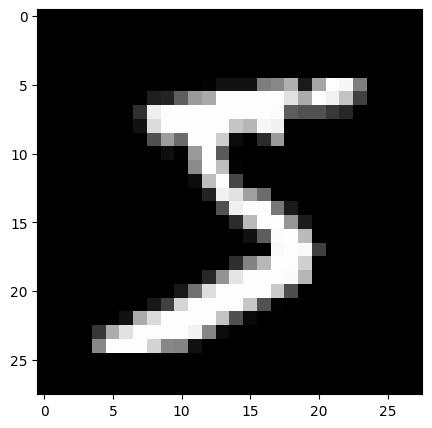

In [131]:
import numpy as np
plt.rcParams['figure.figsize'] = (5.0, 5.0)
sampleimage = [x_image_train[0]]
plt.imshow(np.reshape(sampleimage,[28,28]), cmap="gray")

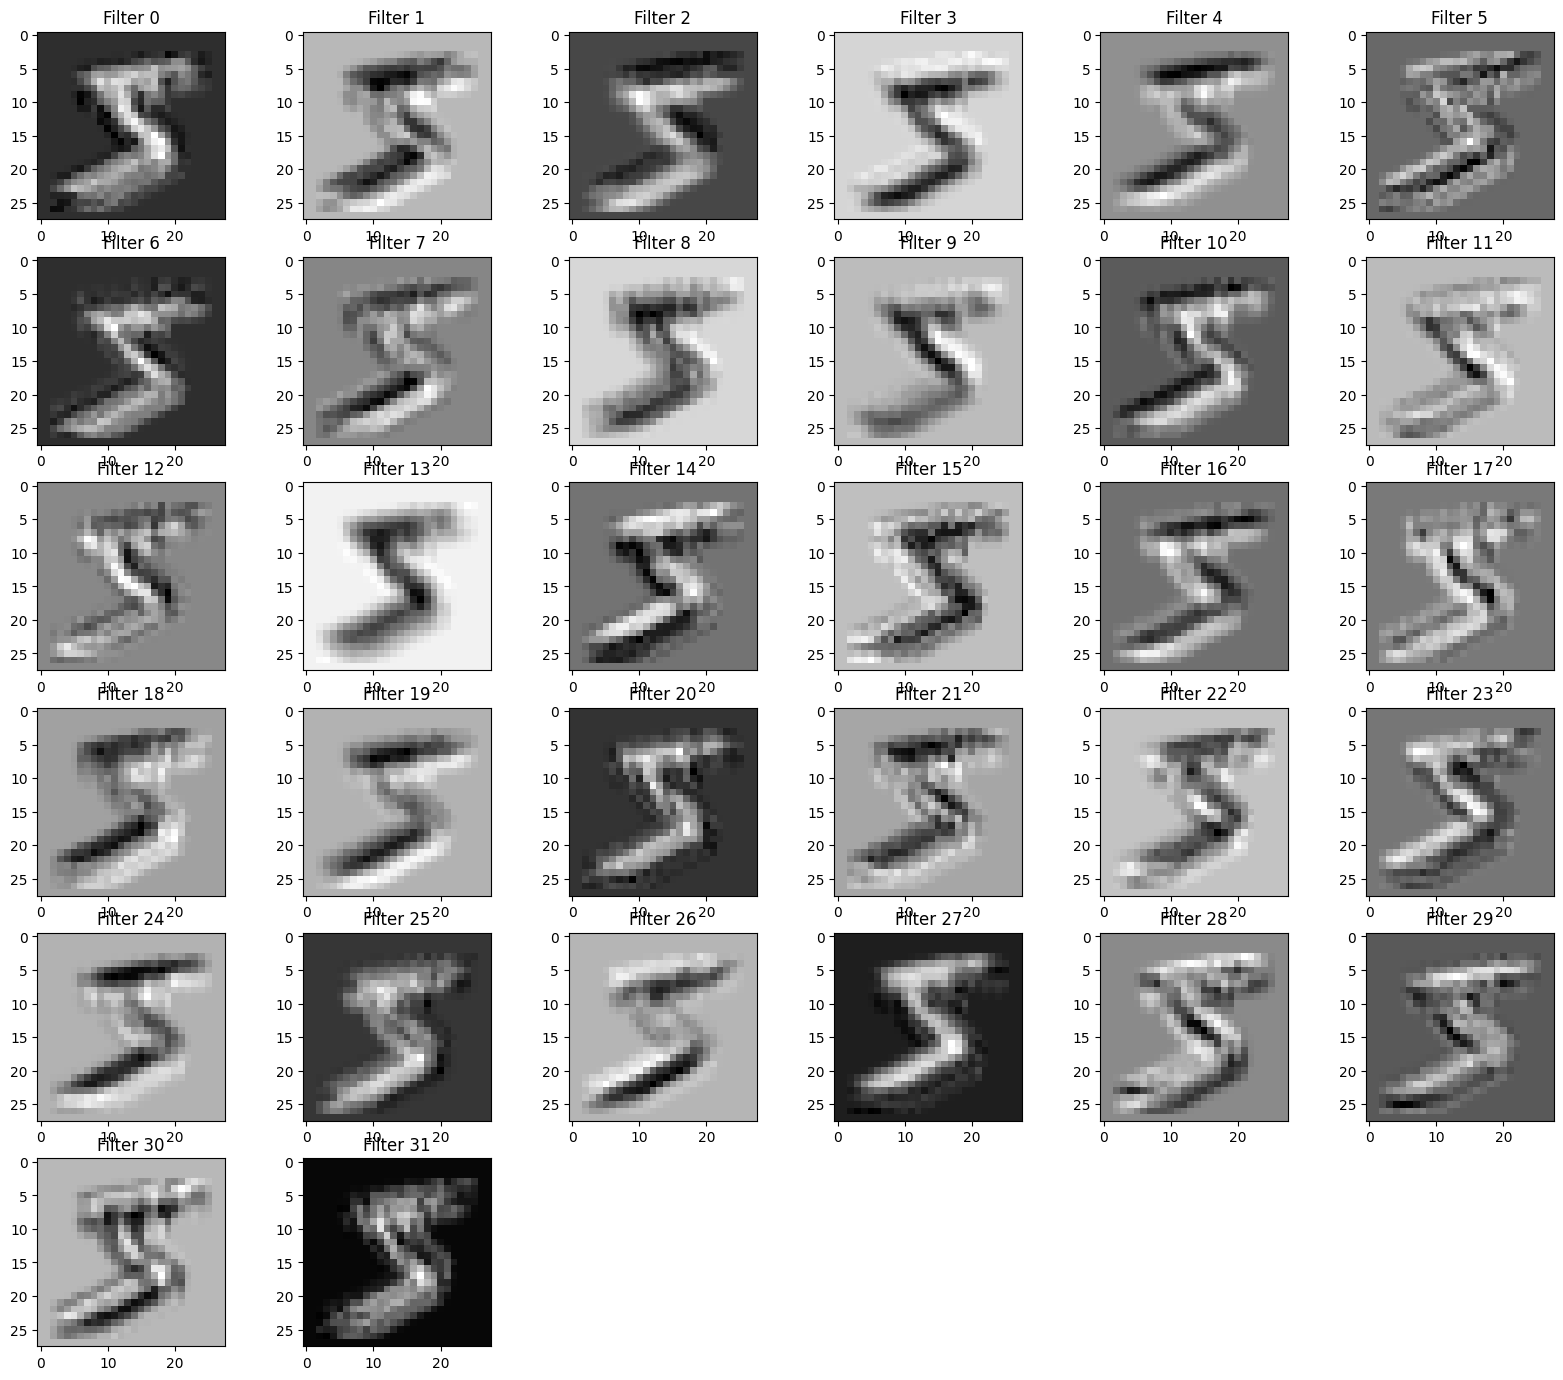

In [134]:
#ActivatedUnits = sess.run(convolve1,feed_dict={x:np.reshape(sampleimage,[1,784],order='F'),keep_prob:1.0})
keep_prob=1.0
sampleimage = np.array(sampleimage)
ActivatedUnits = convolve1(sampleimage)

filters = ActivatedUnits.shape[3]
plt.figure(1, figsize=(20,20))
n_columns = 6
n_rows = int(np.ceil(filters / n_columns)) + 1
for i in range(filters):
    plt.subplot(n_rows, n_columns, i+1)
    plt.title('Filter ' + str(i))
    plt.imshow(ActivatedUnits[0,:,:,i], interpolation="nearest", cmap="gray")

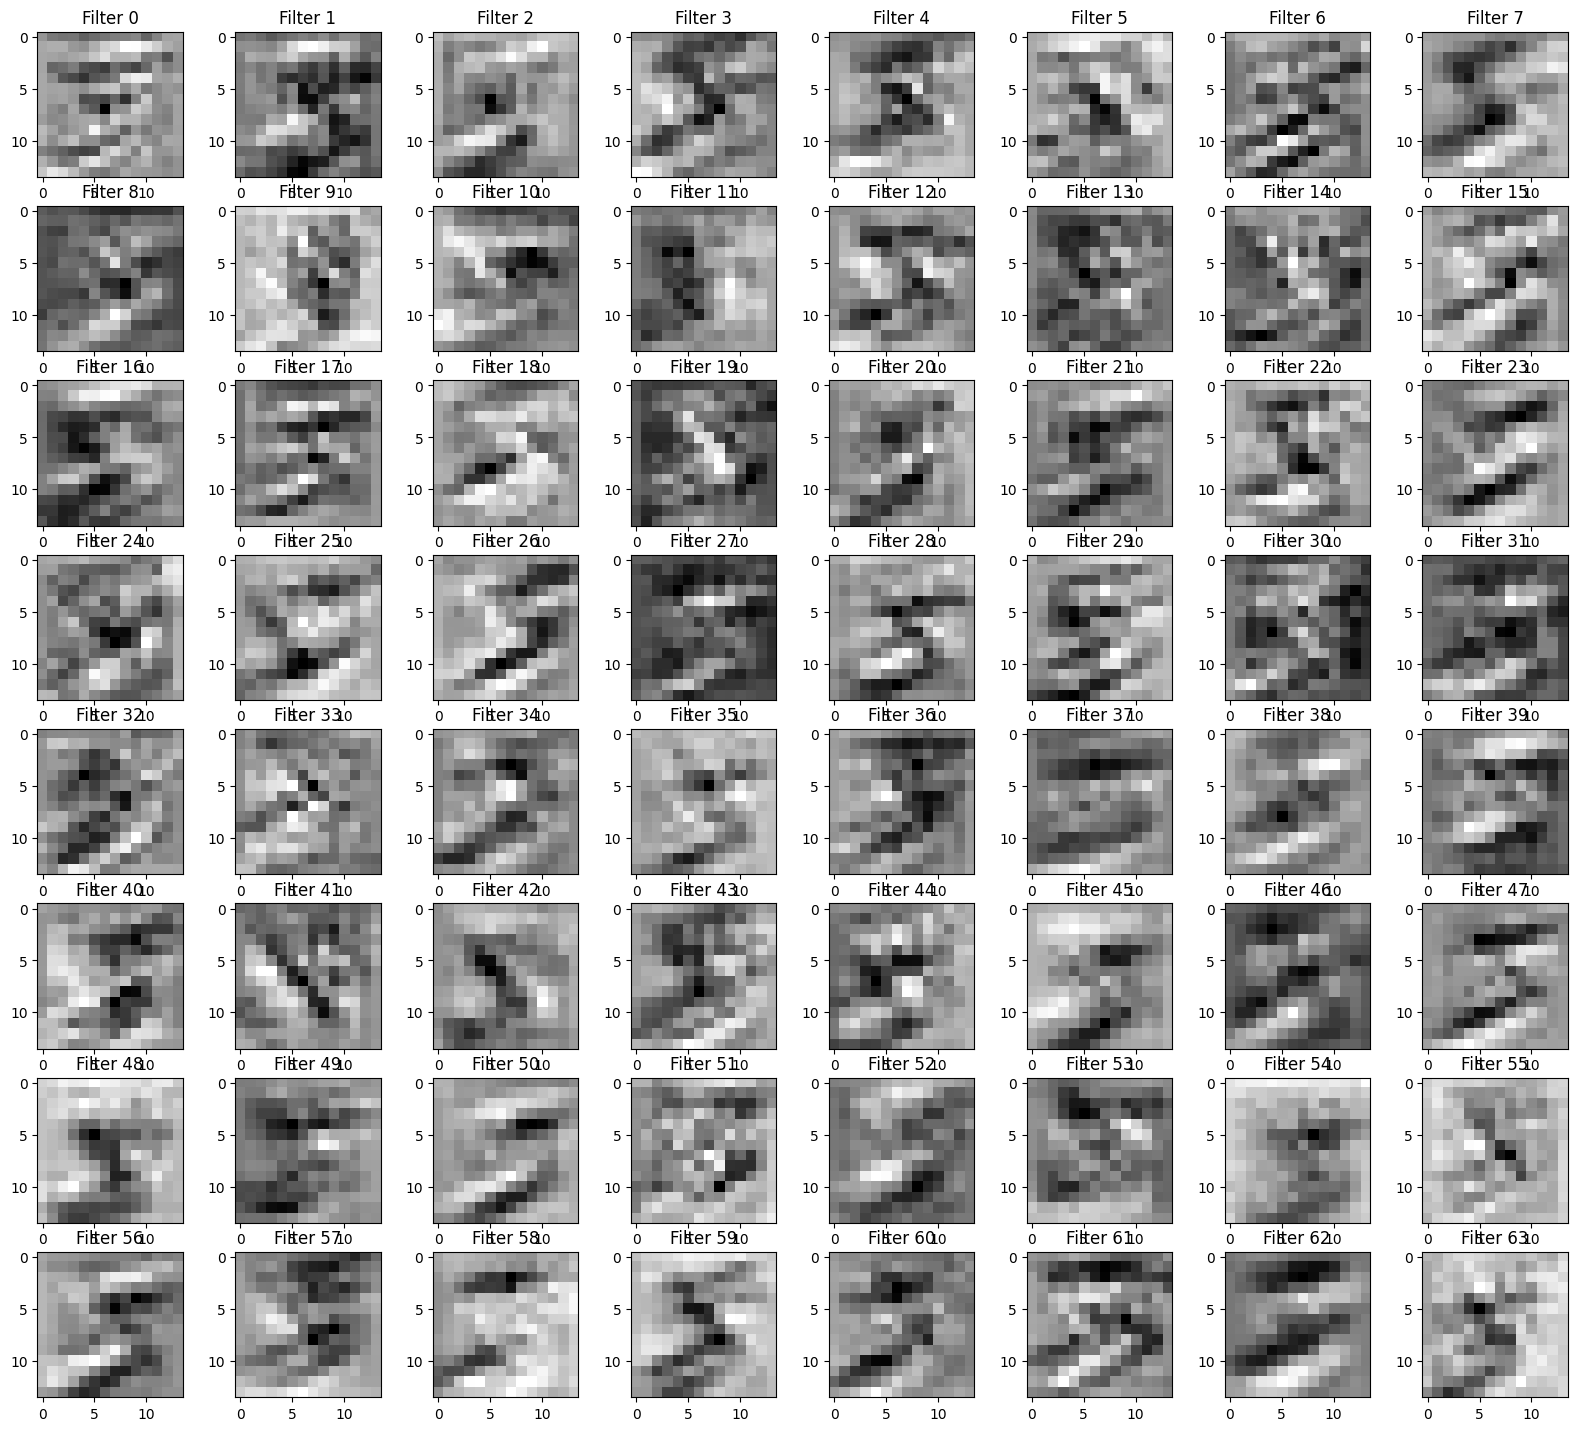

In [138]:
#ActivatedUnits = sess.run(convolve2,feed_dict={x:np.reshape(sampleimage,[1,784],order='F'),keep_prob:1.0})
sampleimage = np.array(sampleimage)
ActivatedUnits = convolve2(sampleimage)
filters = ActivatedUnits.shape[3]
plt.figure(1, figsize=(20,20))
n_columns = 8
n_rows = int(np.ceil(filters / n_columns)) + 1
for i in range(filters):
    plt.subplot(n_rows, n_columns, i+1)
    plt.title('Filter ' + str(i))
    plt.imshow(ActivatedUnits[0,:,:,i], interpolation="nearest", cmap="gray")